# Clustering Crypto

In [53]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


### Deliverable 1: Preprocessing the Data for PCA

In [27]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('Resources/crypto_data.csv', index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [28]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.drop(crypto_df[crypto_df.IsTrading == False].index)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [29]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df.drop(crypto_df[crypto_df.Algorithm == None].index)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [30]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis=1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [31]:
# Remove rows that have at least 1 null value.
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [34]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.drop(crypto_df[crypto_df.TotalCoinsMined < 1].index)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [36]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names = crypto_df[['CoinName']]
crypto_names.head(10)

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic
ZEC,ZCash


In [37]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis=1)
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [42]:
# Use get_dummies() to create variables for text features.
cols = ['Algorithm', 'ProofType']
X = pd.get_dummies(crypto_df,columns=cols)
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Standardize the data with StandardScaler().
X_scaled =StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [44]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(X_scaled)
crypto_pca 

array([[-0.32604372,  0.85376934, -0.44228969],
       [-0.30934198,  0.85339395, -0.44207061],
       [ 2.32942614,  1.45802314, -0.55754656],
       ...,
       [ 0.3159456 , -2.24987694,  0.37055911],
       [-0.15472797, -2.00701055,  0.3918721 ],
       [-0.29460105,  0.76951649, -0.21282807]])

In [52]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC3"], index=X.index.copy()
)
pca_df.head(10)

,PC 1,PC 2,PC3
42,-0.326044,0.853769,-0.442290
404,-0.309342,0.853394,-0.442071
1337,2.329426,1.458023,-0.557547
BTC,-0.154568,-1.247974,0.172073
ETH,-0.158146,-1.932246,0.324635
LTC,-0.168190,-1.171717,0.047206
DASH,-0.386277,1.182265,-0.443993
XMR,-0.154497,-2.113128,0.384238
ETC,-0.156585,-1.932402,0.324661
ZEC,-0.154727,-2.007011,0.391872


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\George\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


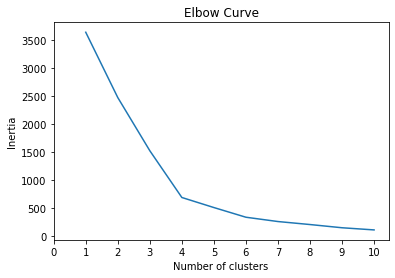

In [54]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [56]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)
predictions

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0,

In [59]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df,pca_df], axis= 1, join="inner")

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.concat([clustered_df,crypto_names], axis= 1, join="inner")

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.326044,0.853769,-0.442290,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.309342,0.853394,-0.442071,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.329426,1.458023,-0.557547,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.154568,-1.247974,0.172073,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.158146,-1.932246,0.324635,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.168190,-1.171717,0.047206,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.386277,1.182265,-0.443993,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154497,-2.113128,0.384238,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.156585,-1.932402,0.324661,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.154727,-2.007011,0.391872,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [77]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x='PC 1',
    y='PC 2',
    z= 'PC3',
    color='Class',
    symbol='Class',
    hover_name= 'CoinName',
    hover_data= ['Algorithm'],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [83]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(
    columns=['CoinName', 'Algorithm', 'ProofType','TotalCoinSupply','TotalCoinsMined', 'Class'],
    sortable=True, 
    selectable=True
)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [105]:
# Print the total number of tradable cryptocurrencies.
print(f'There are {len(clustered_df.CoinName)}  tradable cryptocurrencies.')

There are 532  tradable cryptocurrencies.


In [111]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
clustered_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [112]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    data=clustered_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index.copy()
)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']


plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [119]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined", 
    y="TotalCoinSupply",
    by="Class"
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)